In [1]:
import cv2
import mediapipe as mp
import time

In [2]:
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

In [5]:
cap = cv2.VideoCapture(1)
pTime = 0

In [6]:
while True:
    success, img = cap.read()
    
    # the avove liberary we are using only support rgb not bgr(our video is in bgr)
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
#     print(results.pose_landmarks) # this will print x, y and z codiates
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img,results.pose_landmarks,mpPose.POSE_CONNECTIONS)
        #code to select the perticular landmarks where id is the landmark location number 
        for id,lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = img.shape
#             print(id,lm)
            cx,cy=int(lm.x*w),int(lm.y*h)
            if id == 30:
                cv2.circle(img,(cx,cy),10,(255,0,255),cv2.FILLED)
        
    
    
    #code to calculate FPS
    cTime = time.time()
    fps=1/(cTime-pTime)
    pTime = cTime
    
    cv2.putText(img,str(float(fps)),(70,50),cv2.FONT_HERSHEY_COMPLEX,3,(255,255,0),3)
    
    #code which will show the video
    cv2.imshow("image",img)
    cv2.waitKey(1)

KeyboardInterrupt: 

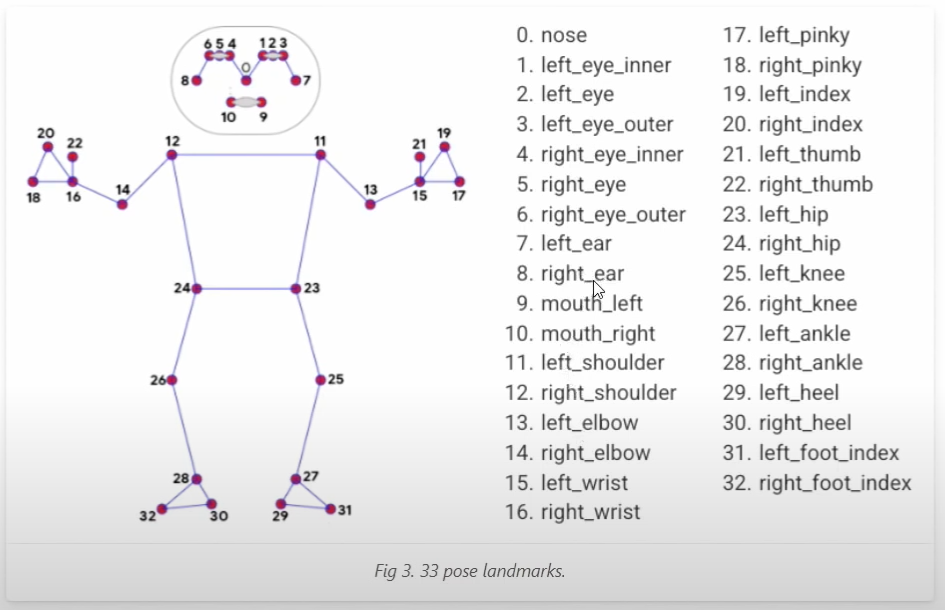

In [7]:
class poseDetector():
    def __init__(self,mode=False,upBody = False, smooth = True,
                 detectionCon = 0.5, trackCon = 0.5):
        self.mode=mode
        self.upBody = upBody
        self.smooth = smooth
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        
        self.mpDraw = mp.solutions.drawing_utils
        self.mpPose = mp.solutions.pose
        self.pose = self.mpPose.Pose(self.mode,self.upBody,self.smooth,
                                     self.detectionCon,self.trackCon)
    def findPose(self,img,draw = True):
        imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        self.results = self.pose.process(imgRGB)
    #   print(results.pose_landmarks) # this will print x, y and z codiates
        if self.results.pose_landmarks:
            if draw == True:
                self.mpDraw.draw_landmarks(img,self.results.pose_landmarks,self.mpPose.POSE_CONNECTIONS)
        return img
    def findPosition(self,img,draw = True):
        lmList = []
        if self.results.pose_landmarks:
            for id,lm in enumerate(self.results.pose_landmarks.landmark):
                h, w, c = img.shape
    #             print(id,lm)
                cx,cy=int(lm.x*w),int(lm.y*h)
                lmList.append([id,cx,cy])
                if draw:
                    cv2.circle(img,(cx,cy),10,(255,0,255),cv2.FILLED)
        return lmList
        
        

def main():
    cap = cv2.VideoCapture('video/3.mp4')
    pTime = 0
    detector = poseDetector()
    while True:
        success, img = cap.read()  
        img=detector.findPose(img)
        lmList = detector.findPosition(img,draw = False)
        
        cTime = time.time()
        fps=1/(cTime-pTime)
        pTime = cTime

        cv2.putText(img,str(float(fps)),(70,50),cv2.FONT_HERSHEY_COMPLEX,3,(255,255,0),3)

        #code which will show the video
        cv2.imshow("image",img)
        cv2.waitKey(1)
    
if __name__ == "__main__":
    main()

TypeError: create_bool(): incompatible function arguments. The following argument types are supported:
    1. (arg0: bool) -> mediapipe.python._framework_bindings.packet.Packet

Invoked with: 0.5